# SVC Cross Validtion Scores vs C-value

The goal here is to visualize the effect of the `C` parameter (the amount of regularization penalty to use) on a `Support Vector Classifier` when classifying samples from the digits dataset. I'm going to use 10-fold cross validation and the ``cross_val_score`` function to get the scores then plot them with matplotlib.

In [245]:
import matplotlib.pyplot as plot
import seaborn
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [246]:
%matplotlib inline

## The data

In [247]:
digits = datasets.load_digits()

In [248]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

## Set up 10 Folds Cross Validation

In [249]:
k_folds = KFold(n_splits=10)

## Set up the logarithmic C-values

In [250]:
c_values = numpy.logspace(-10, 0, 10)

## Set up the linear Support Vector Classifier

In [251]:
model = svm.SVC(kernel='linear')

## Get cross-validation scroes for each C-value

In [252]:
scores = [cross_val_score(model.set_params(C=c_value),
                          digits.data,
                          digits.target,
                          cv=k_folds,
                          n_jobs=-1) for c_value in c_values]

## Plot the mean-scores and standard deviations.

In [253]:
means = numpy.array([numpy.mean(score) for score in scores])
deviations = numpy.array([numpy.std(score) for score in scores])

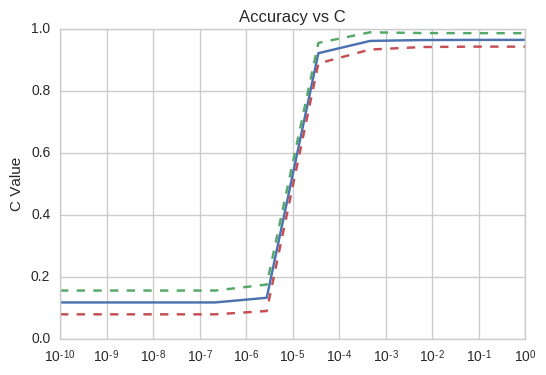

In [254]:
seaborn.set_style("whitegrid")
figure = plot.figure()
axe = figure.gca()
line = plot.plot(c_values, means, axes=axe)
line = plot.plot(c_values, means + deviations, '--')
line = plot.plot(c_values, means - deviations, '--')
title = axe.set_title("Accuracy vs C")
label = axe.set_ylabel("Accuracy")
labels = axe.set_ylabel("C Value")
axe.set_xscale('log')

In [255]:
best_index = means.argmax()
best_c = c_values[means.argmax()]
best_mean = means[best_index]
best_std = deviations[best_index]
print("Best C-value: {0:.5f}".format(best_c))

Best C-value: 0.07743


In [256]:
print("95% Confidence Interval for Accuracy: ({0:.2f} +/- {1:.2f})".format(best_mean,
                                                                           best_std))

95% Confidence Interval for Accuracy: (0.96 +/- 0.02)


In [257]:
model = svm.SVC(kernel="linear")
scores = cross_val_score(model, digits.data, digits.target, cv=k_folds, n_jobs=-1)
mean = numpy.mean(scores)
std = numpy.std(scores)
print("95% Confidence Interval for accuracy of default C-value: ({0:.2f} +/- {1:.2f})".format(mean, std))

95% Confidence Interval for accuracy of default C-value: (0.96 +/- 0.02)


In [258]:
best_mean - mean

0.0

In [259]:
model.C

1.0

It looks like the default does well as the best model that I found by changing the C-values, even though it is set to 1.

# looking at it without the log-plotting

In [273]:
c_values = numpy.linspace(0, 1)[1:]

In [275]:
scores = [cross_val_score(model.set_params(C=c_value),
                          digits.data,
                          digits.target,
                          cv=k_folds,
                          n_jobs=-1) for c_value in c_values]

In [276]:
means = numpy.array([numpy.mean(score) for score in scores])
deviations = numpy.array([numpy.std(score) for score in scores])

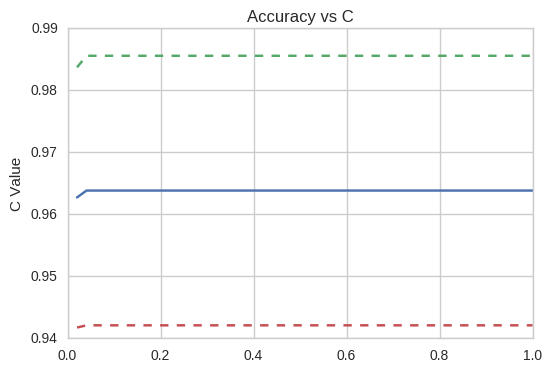

In [278]:
seaborn.set_style("whitegrid")
figure = plot.figure()
axe = figure.gca()
line = plot.plot(c_values, means, axes=axe)
line = plot.plot(c_values, means + deviations, '--')
line = plot.plot(c_values, means - deviations, '--')
title = axe.set_title("Accuracy vs C")
label = axe.set_ylabel("Accuracy")
labels = axe.set_ylabel("C Value")

So apparently the reason for the log-scale is that the greatest changes occur at nearly 0, after that there's little to no improvement in increasing the penalty.